In [1]:
#Part 2 of code for my DSA Project on COVID-19 and its effects
#Dhruv Gupta
#EP17BTECH11006@IITH.AC.IN
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import pandas
import csv
from decimal import Decimal

In [2]:
gl_cases=pandas.read_csv('time_series_covid19_confirmed_global.csv', index_col=False)
ind_petrol=pandas.read_csv('petrol.csv',index_col=False)
state_cases=pandas.read_csv('state_cases.csv',index_col=False)
crude_prices=pandas.read_csv('wti_crude_prices.csv',index_col=False)
delhi_mundka=pandas.read_csv('delhi_mundka.csv',index_col=False)
pd_aqi=pandas.read_csv('AQI.csv',index_col=False)

date_r=gl_cases.columns[3:].to_numpy() #takes array of dates

In [3]:
#Extract total cumulative cases globally
tot_cases=gl_cases.iloc[:,3:].sum().to_numpy()

#Extract cumulative cases for India and convert to array
cases=gl_cases[(gl_cases['Country/Region']=='India')]
c_data=(cases.iloc[:,3:]).to_numpy()

# ctry=cases.iloc[:,0].to_numpy()

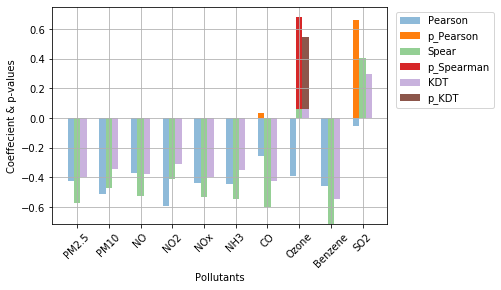

In [4]:
# Pollution Correlation

#Extracting concentration of all pollutants in dataframe
poll=delhi_mundka.loc[:,'PM2.5':].to_numpy().transpose()
#labels
labs=delhi_mundka.columns

corr=[]
pcorr=[]

#correlation calculator
for i in range(len(labs)):
    pearson,pp=stats.pearsonr(c_data[0],poll[i])
    spear,ps=stats.spearmanr(c_data[0],poll[i])
    kendt,pk=stats.kendalltau(c_data[0],poll[i])
    corr.append([pearson,spear,kendt])
    pcorr.append([pp,ps,pk])
corr=np.array(corr)
pcorr=np.array(pcorr)

#Making stacked bar plots
x=np.arange(len(labs))
width=0.2
plt.bar(x-(width),corr[:,0],width,alpha=0.5,label='Pearson')
plt.bar(x-(width),pcorr[:,0],width,label='p_Pearson')

plt.bar(x,corr[:,1],width,alpha=0.5,label='Spear')
plt.bar(x,pcorr[:,1],width,bottom=corr[:,1],label='p_Spearman')

plt.bar(x+(width),corr[:,2],width,alpha=0.5,label='KDT')
plt.bar(x+(width),pcorr[:,2],width,bottom=corr[:,2],label='p_KDT')
plt.xticks(x,labs,rotation=45)
plt.xlabel('Pollutants')
plt.ylabel('Coeffecient & p-values')
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))

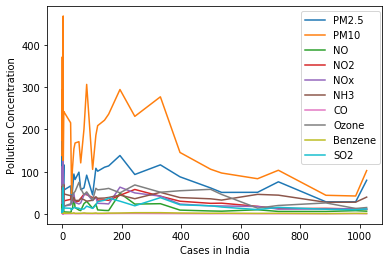

In [5]:
#Plot of pollutant concentrations against COVID-19 cases
for i in range(len(poll)):
    plt.plot(c_data[0],poll[i],label=labs[i])
plt.xlabel('Cases in India')
plt.ylabel('Pollution Concentration')
plt.legend(bbox_to_anchor=(1.01, 1))

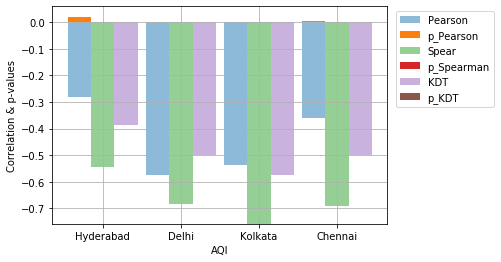

In [6]:
#AQI Correlations

#Extracting AQI values for four cities
aqi=pd_aqi.loc[:,'Hyderabad':].to_numpy().transpose()
labs=pd_aqi.columns
corr=[]
pcorr=[]

#calculating correlations
for i in range(len(labs)):
    pearson,pp=stats.pearsonr(c_data[0],aqi[i])
    spear,ps=stats.spearmanr(c_data[0],aqi[i])
    kendt,pk=stats.kendalltau(c_data[0],aqi[i])
    corr.append([pearson,spear,kendt])
    pcorr.append([pp,ps,pk])
corr=np.array(corr)
pcorr=np.array(pcorr)

      #plotting stacked bar plots
x=np.arange(len(labs))
width=0.3
plt.bar(x-(width),corr[:,0],width,alpha=0.5,label='Pearson')
plt.bar(x-(width),pcorr[:,0],width,label='p_Pearson')

plt.bar(x,corr[:,1],width,alpha=0.5,label='Spear')
plt.bar(x,pcorr[:,1],width,bottom=corr[:,1],label='p_Spearman')

plt.bar(x+(width),corr[:,2],width,alpha=0.5,label='KDT')
plt.bar(x+(width),pcorr[:,2],width,bottom=corr[:,2],label='p_KDT')
plt.xticks(x,labs)
plt.xlabel('AQI')
plt.ylabel('Correlation & p-values')
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))

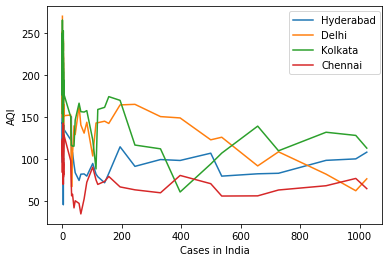

In [7]:
#Plotting AQIs against COVID-19 cases
for i in range(len(aqi)):
    plt.plot(c_data[0],aqi[i],label=labs[i])
plt.xlabel('Cases in India')
plt.ylabel('AQI')
plt.legend(bbox_to_anchor=(1.01, 1))

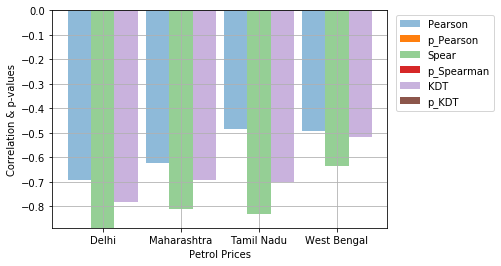

In [8]:
# Petrol Prices Correlations State-Wise (wrt to State Patients)

state=state_cases.loc[:,'Delhi':].to_numpy().transpose()
labs=state_cases.columns
corr=[]
pcorr=[]
petrol=ind_petrol.loc[:,'Delhi':].to_numpy().transpose()

for i in range(len(labs)):
    pearson,pp=stats.pearsonr(state[i],petrol[i])
    spear,ps=stats.spearmanr(state[i],petrol[i])
    kendt,pk=stats.kendalltau(state[i],petrol[i])
    corr.append([pearson,spear,kendt])
    pcorr.append([pp,ps,pk])
corr=np.array(corr)
pcorr=np.array(pcorr)

x=np.arange(len(labs))
width=0.3
plt.bar(x-(width),corr[:,0],width,alpha=0.5,label='Pearson')
plt.bar(x-(width),pcorr[:,0],width,bottom=corr[:,1],label='p_Pearson')

plt.bar(x,corr[:,1],width,alpha=0.5,label='Spear')
plt.bar(x,pcorr[:,1],width,bottom=corr[:,1],label='p_Spearman')

plt.bar(x+(width),corr[:,2],width,alpha=0.5,label='KDT')
plt.bar(x+(width),pcorr[:,2],width,bottom=corr[:,2],label='p_KDT')
plt.xticks(x,labs)
plt.xlabel('Petrol Prices')
plt.ylabel('Correlation & p-values')
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))

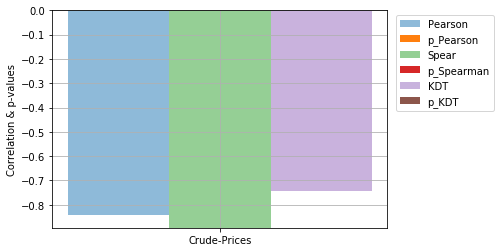

In [9]:
#World Cases correlation With Crude Prices
crude=crude_prices.iloc[:,1].to_numpy()

pearson,pp=stats.pearsonr(tot_cases,crude)
spear,ps=stats.spearmanr(tot_cases,crude)
kendt,pk=stats.kendalltau(tot_cases,crude)

x=np.array([0])
width=0.3
plt.bar(x-(width),pearson,width,alpha=0.5,label='Pearson')
plt.bar(x-(width),pp,width,label='p_Pearson')

plt.bar(x,spear,width,alpha=0.5,label='Spear')
plt.bar(x,ps,width,bottom=spear,label='p_Spearman')

plt.bar(x+(width),kendt,width,alpha=0.5,label='KDT')
plt.bar(x+(width),pk,width,bottom=kendt,label='p_KDT')
plt.xticks(x,['Crude-Prices'])
plt.ylabel('Correlation & p-values')
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))

Text(0, 0.5, 'Crude Prices')

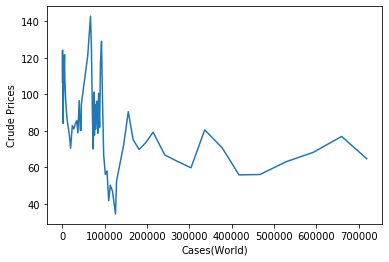

In [10]:
#plot of crude oil prices against cumulative COVID-19 cases globally
plt.plot(tot_cases,aqi[i])
plt.xlabel('Cases(World)')
plt.ylabel('Crude Prices')